<a href="https://colab.research.google.com/github/KingaTeklak/lista6/blob/main/lista_6_ostateczna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import matplotlib
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import copy


# Zadanie 1
Wymyśl sposób reprezentowania takich dysków przy pomocy jednego z
wbudowanych typów danych w Pythonie

In [2]:
N = 100
""" N = int: ilość generowanych dysków"""

' N = int: ilość generowanych dysków'

In [3]:
def generate_disks(n):
  """funkcja generate_disks przyjmuje za argument int jakos ilość dysków do wygenerowania.
  Generuje n losowych dysków, ograniczonych przez płaszczyznę -15<=x,y<=15 o promieniu 0,5"""
  disks = []

  for i in range(n):
    x = round(random.uniform(-14.5, 14.5), 1)
    y = round(random.uniform(-14.5, 14.5), 1)
    r = round(random.uniform(0.5, 0.51), 1)

    disks.append([x, y, r])

  return disks


Wygenerowanie dyski:

In [11]:
"""
disks = wygenerowane dyski w ilości N. W postaci listy listy
disks.sort = posortowane dyski po współrzędnej X. W postaci listy list.
disk_copy = kopia dysków z ustawienia początkowego
"""

disks = generate_disks(N)


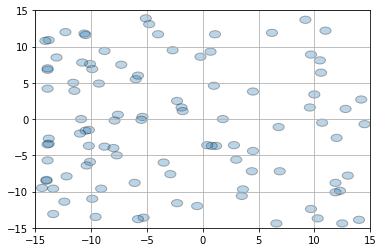

[[4.5, -4.4, 0.5], [-13.8, -2.7, 0.5], [-10.6, 11.8, 0.5], [-4.0, 11.7, 0.5], [4.5, 3.8, 0.5], [-7.6, 0.6, 0.5], [-5.4, 0.3, 0.5], [-13.8, -3.4, 0.5], [-6.0, 5.5, 0.5], [-11.5, 3.9, 0.5], [-4.8, 13.1, 0.5], [-8.0, -4.0, 0.5], [10.3, -13.7, 0.5], [-13.9, -5.7, 0.5], [-13.4, -13.1, 0.5], [-9.6, -13.5, 0.5], [-9.3, 4.9, 0.5], [-10.1, 7.6, 0.5], [-10.5, -1.6, 0.5], [6.2, 11.9, 0.5], [0.7, 9.3, 0.5], [3.6, -9.7, 0.5], [-2.9, -7.6, 0.5], [-5.5, -0.1, 0.5], [14.2, 2.7, 0.5], [-13.8, 10.9, 0.5], [-13.9, 6.8, 0.5], [-10.1, -5.9, 0.5], [-3.5, -6.0, 0.5], [-5.3, -13.6, 0.5], [-13.4, -9.6, 0.5], [-2.7, 9.5, 0.5], [9.6, 1.6, 0.5], [3.5, -10.6, 0.5], [13.0, -7.8, 0.5], [-14.4, -9.5, 0.5], [-5.1, 13.9, 0.5], [1.2, -3.7, 0.5], [-2.3, 2.5, 0.5], [0.8, -3.7, 0.5], [-1.9, 1.6, 0.5], [-10.8, 7.8, 0.5], [12.5, -14.4, 0.5], [9.7, 8.9, 0.5], [1.8, 0.0, 0.5], [-13.9, 7.0, 0.5], [-14.1, 10.8, 0.5], [12.3, -9.9, 0.5], [3.0, -5.6, 0.5], [6.8, -1.1, 0.5], [1.1, 11.7, 0.5], [-8.8, 9.4, 0.5], [-12.3, 12.0, 0.5], [-

In [12]:
def draw_disks(disks):
  """ Funckja draw_disks to wykres obrazujący początkowe ustawienie dysków, mocniejszym kolorem zaznaczone są miejsca kolizji.
  Jako argument przyjmuje listę list będącą listą wszytskich dysków."""
  fig = plt.figure()
  ax = fig.add_subplot(111) 
  for disk in disks:
    crcle = matplotlib.patches.Circle((disk[0], disk[1]), disk[2], alpha = 0.3, edgecolor="black")
    ax.add_patch(crcle)

  plt.xlim(-15, 15)
  plt.ylim(-15, 15)
  plt.grid()
  plt.show()
  print(disks)

draw_disks(disks)

# Zadanie 2
Napisz funkcję, która będzie wykrywać kolizję między dwoma dyskami.
Funkcja ta powinna zwracać wartość True, jeżeli dyski „zachodzą” na
siebie

In [6]:
def colision(first_disk, second_disk):
  """ sprawdzenie kolizji dwóch wybranych dysków.
  Jeśli odległośc między ich punktami środkowymi jest mniejsza od 2 promieni wtedy dyski na siebie nachodzą.
  Odlęgłość obliczona ze wzoru sqrt((x1-x1)**2 +(y1-y2)**2)
  Funkcja zwraca prawdę, jeśli wykryje kolizję, fałsz, jeśli nie
  Funkcja przyjmuje 2 argumenty: dwa sprawdzane dyski w postaci 2 list 3 elementowych ( wspołrzędna x,y oraz promień)"""
  r_sum = first_disk[2] + second_disk[2]
  distance = math.sqrt((first_disk[0] - second_disk[0]) ** 2 + (first_disk[1] - second_disk[1]) ** 2)

  return distance < r_sum

colision(disks[28], disks[30])


False

# Zadanie 3
 Napisz funkcję, która przesunie dysk na płaszczyźnie o wektor podany
jako drugi argument.

In [7]:

def move_disk(disk, vector):
    disk[0] += vector[0]
    disk[1] += vector[1]


def move_x(disk):
    """
    Funkcja vector_x zmienia współrzęną x o wartość promienia, jeśli jednak współrzędna
    x jest równa maksymalnej możliwej wartości wtedy wartość x staje się możliwie najmniejsza.
    Funkcja przyjmuje jako argument przesuwany dysk
    """
    x_offset = 0.5 if disk[0] <= 14.0 else -disk[0] - 14.5

    move_disk(disk, (x_offset, 0))


def move_y(disk):
    """
    Funkcja vector_y zmienia współrzęną y o wartość promienia, jeśli jednak współrzędna y
    jest równa maksymalnej możliwej wartości wtedy wartość y staje się możliwie najmniejsza.
    Funkcja przyjmuje jako argument przesuwany dysk
    """
    y_offset = 0.5 if disk[0] <= 14.0 else -disk[0] - 14.5

    move_disk(disk, (0, y_offset))

Szukam odpowiedniego wektora

# Zadanie 5
 Napisz program, który na płaszczyźnie −15 ¬ x, y ¬ 15:
• rozmieści 100 dysków o promieniu r = 0.5 w losowych położeniach,
• wykryje kolizje.
• rozsunie dyski tak, żeby co najwyżej stykały się ze sobą.
Program powinien zakończyć działanie po usunięciu ostatniej z kolizji.

In [13]:
def seperate_disks(input_disks):
    """
    Funkcja separate_disks zamienia ułożenie kolizyjne dysków na niekolizyjne. Przyjmuje jeden argument: listę dysków do sprawdzenia.
    Iteruje przez listę dysków szukajac kolizji, jeśli ją znadzie przesuwa dysk po współrzędnej y o mozliwie małą odległość.
    Jesli ilość takich przesunięć jest wystarczająco duża by dysk znalazł się ustawiwniu początkowym wtedy przerywa przesuwanie po y i przesuwa o odległość 1 promienia po x.
    I powtarz cała procedurę po y. Dyski są posortowane po zmiennej x, więc sprawdzane dyski to tylko te, których odległość od punktów środkowych jest mniejsza od sumy ich promieni.
    Funkcja zwraca listę bezkolizyjnych dysków
    """
    disks = copy.deepcopy(input_disks)
    disks.sort(key=lambda n: n[0])
    
    num_of_changes = 0
    #n = 0
    
    for first_disk in disks:
        #n += 1
        _remove_collisions(first_disk, disks)

    return disks


def _remove_collisions(disk, disks_to_check):
    for i in range(len(disks_to_check)):
        test_disk = disks_to_check[i]

        if disk == test_disk:
            continue # jak to zrobić zeby on iterował przez wszytskie podejrzane dyski
        # Filter safe disks on the left
        if test_disk[0] + test_disk[2] + disk[2] < disk[0]:
            continue
        # Filter safe disks on the right
        if disk[0] + test_disk[2] + disk[2] < test_disk[0]:
            break

        num_of_changes = 0
        while colision(disk, test_disk):
            if num_of_changes > 28:
                move_x(disk)
                num_of_changes = 0
            else:
                move_y(disk)
                num_of_changes += 1

        if i > 0:
            disks_copy = disks_to_check[0:i-1]
            disks_copy.sort(key=lambda n: n[0])

            _remove_collisions(disk, disks_copy)




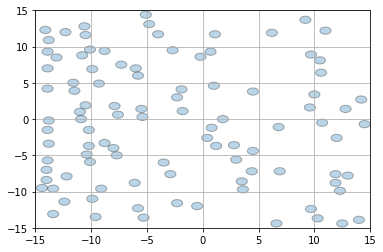

In [14]:
def draw_new_disks(disks):
  """ Funkcja draw_new_disks przyjmuje za argument listę dysków. 
  Iteruje przez listę list, gdzie bierze pierwszą i drugą wartość i ustala z nim odpowiednio współrzędną x i y plotowanych dysków. Wartość 3 odpowiada promieniowi.
  Dyski przedstawione są w postaci kół. Funkcja zwraca wykres z naniesionymi dyskami.""" 
  fig = plt.figure()
  ax = fig.add_subplot(111) 
  for disk in disks:
    crcle = matplotlib.patches.Circle((disk[0], disk[1]), disk[2], alpha = 0.3, edgecolor="black")
    ax.add_patch(crcle)
  #for disk_copy in disks_copy:
    #crcle_copy = matplotlib.patches.Circle((disk_copy[0], disk_copy[1]), disk_copy[2], alpha = 0.3, color = "yellow", edgecolor="black")
    #ax.add_patch(crcle_copy)

  plt.xlim(-15, 15)
  plt.ylim(-15, 15)
  plt.grid()
  plt.show()
  
disks_separated_list = seperate_disks(disks)
draw_new_disks(disks_separated_list)

wartosc wektora, porównywanie ograniczonej lb dysków, wybieranie które dyski porównujemy, animacja

In [15]:
def old_and_new():
  """ Funkcja old_and_new printuje poczatkowe i końcowe ustawnienie dysków."""
  print("początkowe ustawienie: ", disks)
  print("końcowe ustawienie: ", disks_separated_list)
old_and_new()

def check_if_all_in_bounds(disks):
    """ Funkcja old_and_new printuje poczatkowe i końcowe ustawnienie dysków."""
    ret_val = True

    for disk in disks:
        if not -14.5 <= disk[0] <= 14.5:
            ret_val = False
            break
        elif not -14.5 <= disk[1] <= 14.5:
            ret_val = False
        break
    
    return ret_val
check_if_all_in_bounds(disks)


początkowe ustawienie:  [[4.5, -4.4, 0.5], [-13.8, -2.7, 0.5], [-10.6, 11.8, 0.5], [-4.0, 11.7, 0.5], [4.5, 3.8, 0.5], [-7.6, 0.6, 0.5], [-5.4, 0.3, 0.5], [-13.8, -3.4, 0.5], [-6.0, 5.5, 0.5], [-11.5, 3.9, 0.5], [-4.8, 13.1, 0.5], [-8.0, -4.0, 0.5], [10.3, -13.7, 0.5], [-13.9, -5.7, 0.5], [-13.4, -13.1, 0.5], [-9.6, -13.5, 0.5], [-9.3, 4.9, 0.5], [-10.1, 7.6, 0.5], [-10.5, -1.6, 0.5], [6.2, 11.9, 0.5], [0.7, 9.3, 0.5], [3.6, -9.7, 0.5], [-2.9, -7.6, 0.5], [-5.5, -0.1, 0.5], [14.2, 2.7, 0.5], [-13.8, 10.9, 0.5], [-13.9, 6.8, 0.5], [-10.1, -5.9, 0.5], [-3.5, -6.0, 0.5], [-5.3, -13.6, 0.5], [-13.4, -9.6, 0.5], [-2.7, 9.5, 0.5], [9.6, 1.6, 0.5], [3.5, -10.6, 0.5], [13.0, -7.8, 0.5], [-14.4, -9.5, 0.5], [-5.1, 13.9, 0.5], [1.2, -3.7, 0.5], [-2.3, 2.5, 0.5], [0.8, -3.7, 0.5], [-1.9, 1.6, 0.5], [-10.8, 7.8, 0.5], [12.5, -14.4, 0.5], [9.7, 8.9, 0.5], [1.8, 0.0, 0.5], [-13.9, 7.0, 0.5], [-14.1, 10.8, 0.5], [12.3, -9.9, 0.5], [3.0, -5.6, 0.5], [6.8, -1.1, 0.5], [1.1, 11.7, 0.5], [-8.8, 9.4, 0.5]

True